# Implementación Newton-Raphson

In [41]:
import numpy as np
import scipy as sp
from scipy.misc import derivative
import sympy as sp
import random
import matplotlib.pyplot as plt

## 3.1 Problema 1

Se va a calcular el máximo y el mínimo de la siguiente equación: 
$$
f(x) = 3x^3 - 10x^2 + 56x +50
$$

In [26]:
eq = np.poly1d([3,-10,-56,50])
print("ecuación original:")
print(eq)
#Ahora calcularemos la primera y segunda derivada
deriv1 = np.polyder(eq)
print(f"Primera derivada:")
print(deriv1)
deriv2 = np.polyder(deriv1)
print(f"Segunda derivada:")
print(deriv2)

ecuación original:
   3      2
3 x - 10 x - 56 x + 50
Primera derivada:
   2
9 x - 20 x - 56
Segunda derivada:
 
18 x - 20


In [55]:
def One_D_Newton(equation, tolerance, initial):
    deriv1 = np.polyder(equation)  
    deriv2 = np.polyder(deriv1)   
    n = 0
    actual_tol = 999
    x_k = initial
    max_iter = 1000
    while actual_tol > tolerance and n < max_iter:
        #Derivadas evaluadas en el punto en el que estamos
        primera_ev = np.polyval(deriv1, x_k)
        segunda_ev = np.polyval(deriv2, x_k)
        
        x_kplus1 = x_k - (primera_ev / segunda_ev)
        
        # diferencia entre las x's actual (para la tolerancia)
        actual_tol = abs(x_kplus1 - x_k)
        #print(f"tolerancia actual: {actual_tol}")
        n += 1
        x_k = x_kplus1
    
    optimo = ""
    #No se usa el criterio de la hessiana por lo que es una ecuación 1D
    if np.polyval(deriv2, x_kplus1) > 0:
        optimo = "min"
        print(f"Mínimo local en x = {x_kplus1}")
    elif np.polyval(deriv2, x_kplus1) < 0:
        print(f"Máximo local en x = {x_kplus1}")
        optimo = "max"
    else:
        print(f"test de la segunda derivada inconcluso con punto incial {initial})")
        optimo = "nul"
    #print(f"Valor de la función en x = {x_kplus1}: {np.polyval(equation, x_kplus1)}")

    return optimo, x_kplus1, actual_tol

Ahora se puede probar la función para la ecuación, probando con todos los enteros entre [-6,6] como puntos iniciales y probando con diferentes valores de convergencia/tolerancia para ver cuan preciso es el método

In [36]:
init_tolerance = 0.6
#print(eq)
min_tol = 100
max_tol = 100
punto_min = 0
punto_max = 0
for val_inicial in range(-6,6):
    optimo, resp, actual_tol = One_D_Newton(eq, init_tolerance, val_inicial)
    if optimo=="min" and actual_tol<min_tol:
        min_tol = actual_tol
        punto_min = resp
    if optimo=="max" and actual_tol<max_tol:
        max_tol = actual_tol
        punto_max = resp
print(f"Los puntos minimos y máximos de la función son: {punto_min} y {punto_max} respectivamente")


Máximo local en x = -1.6280245255855106
Máximo local en x = -1.622095367522007
Máximo local en x = -1.666368286445013
Máximo local en x = -1.6286660456706072
Máximo local en x = -1.6428571428571428
Máximo local en x = -1.6210662667030271
Máximo local en x = -1.625055146043296
Máximo local en x = -1.6495597447709407
Mínimo local en x = 3.866481650046378
Mínimo local en x = 3.8478525788814966
Mínimo local en x = 3.8461538461538463
Mínimo local en x = 3.846946028274623
Los puntos minimos y máximos de la función son: 3.8461538461538463 y -1.6210662667030271 respectivamente


In [37]:
init_tolerance = 0.06
#print(eq)
min_tol = 100
max_tol = 100
punto_min = 0
punto_max = 0
for val_inicial in range(-6,6):
    optimo, resp, actual_tol = One_D_Newton(eq, init_tolerance, val_inicial)
    if optimo=="min" and actual_tol<min_tol:
        min_tol = actual_tol
        punto_min = resp
    if optimo=="max" and actual_tol<max_tol:
        max_tol = actual_tol
        punto_max = resp
print(f"Los puntos minimos y máximos de la función son: {punto_min} y {punto_max} respectivamente")


Máximo local en x = -1.6196142241481961
Máximo local en x = -1.6196024107161833
Máximo local en x = -1.6199950027010181
Máximo local en x = -1.6196162685302693
Máximo local en x = -1.6196994648003293
Máximo local en x = -1.6196016655304355
Máximo local en x = -1.619606708241754
Máximo local en x = -1.6197638256541746
Mínimo local en x = 3.841933829442201
Mínimo local en x = 3.8418301360703255
Mínimo local en x = 3.841826923076923
Mínimo local en x = 3.8418282906621277
Los puntos minimos y máximos de la función son: 3.841826923076923 y -1.6196016655304355 respectivamente


In [38]:
init_tolerance = 0.0001
#print(eq)
min_tol = 100
max_tol = 100
punto_min = 0
punto_max = 0
for val_inicial in range(-6,6):
    optimo, resp, actual_tol = One_D_Newton(eq, init_tolerance, val_inicial)
    if optimo=="min" and actual_tol<min_tol:
        min_tol = actual_tol
        punto_min = resp
    if optimo=="max" and actual_tol<max_tol:
        max_tol = actual_tol
        punto_max = resp
print(f"Los puntos minimos y máximos de la función son: {punto_min} y {punto_max} respectivamente")


Máximo local en x = -1.6196012727961593
Máximo local en x = -1.6196012727656832
Máximo local en x = -1.6196012727654463
Máximo local en x = -1.6196012728066207
Máximo local en x = -1.6196012745307966
Máximo local en x = -1.6196012727654743
Máximo local en x = -1.6196012727708557
Máximo local en x = -1.6196012727654463
Mínimo local en x = 3.8418234949876684
Mínimo local en x = 3.8418234949957437
Mínimo local en x = 3.84182349498982
Mínimo local en x = 3.8418234949918793
Los puntos minimos y máximos de la función son: 3.8418234949876684 y -1.6196012727654463 respectivamente


### Análisis gráfico

Ya que se encontraron los puntos máximos y mínimos locales para la función original, se va a analizar gráficamente la relación entre los valores de inicio y los valores óptimos (máximos y minimos) encontrados. Para esto, se modificará la función de calcular máximo o mínimo para que se almacene la información sobre si un punto inicial llevó a un máximo o a un mínimo

Máximo local en x = -1.6196012727961593
Máximo local en x = -1.6196012727656832
Máximo local en x = -1.6196012727654463
Máximo local en x = -1.6196012728066207
Máximo local en x = -1.6196012745307966
Máximo local en x = -1.6196012727654743
Máximo local en x = -1.6196012727708557
Máximo local en x = -1.6196012727654463
Mínimo local en x = 3.8418234949876684
Mínimo local en x = 3.8418234949957437
Mínimo local en x = 3.84182349498982
Mínimo local en x = 3.8418234949918793
Los puntos mínimos y máximos de la función son: 3.8418234949876684 y -1.6196012727654463 respectivamente


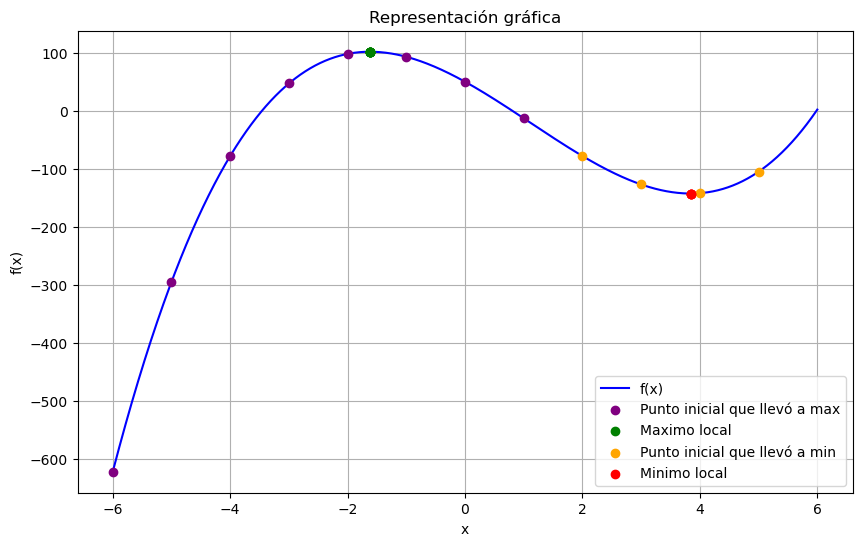

In [ ]:
init_tolerance = 0.0001
min_tol = 100
max_tol = 100
punto_min = 0
punto_max = 0

# Lists to store results
starting_points = []
critical_points = []
types = []  # "min", "max", or "nul"

# Loop over initial guesses
for val_inicial in range(-6, 6):
    optimo, resp, actual_tol = One_D_Newton(eq, init_tolerance, val_inicial)
    starting_points.append(val_inicial)
    critical_points.append(resp)
    types.append(optimo)
    
    if optimo == "min" and actual_tol < min_tol:
        min_tol = actual_tol
        punto_min = resp
    if optimo == "max" and actual_tol < max_tol:
        max_tol = actual_tol
        punto_max = resp

print(f"Los puntos mínimos y máximos de la función son: {punto_min} y {punto_max} respectivamente")

# Plotting
x_vals = np.linspace(-6, 6, 1000)  
y_vals = eq(x_vals)  

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue")  
min_start_added = False
max_start_added = False
min_crit_added = False
max_crit_added = False
# Graficar los puntos en la diferente jerarquía de color
for start, crit, typ in zip(starting_points, critical_points, types):
    if typ == "min":
        if not min_start_added:
            plt.scatter(start, eq(start), color="orange", label="Punto inicial que llevó a min", zorder=5)
            min_start_added = True
        else:
            plt.scatter(start, eq(start), color="orange", zorder=5)
        if not min_crit_added:
            plt.scatter(crit, eq(crit), color="red", label="Minimo local", zorder=5)
            min_crit_added = True
        else:
            plt.scatter(crit, eq(crit), color="red", zorder=5)
    elif typ == "max":
        if not max_start_added:
            plt.scatter(start, eq(start), color="purple", label="Punto inicial que llevó a max", zorder=5)
            max_start_added = True
        else:
            plt.scatter(start, eq(start), color="purple", zorder=5)
        if not max_crit_added:
            plt.scatter(crit, eq(crit), color="green", label="Maximo local", zorder=5)
            max_crit_added = True
        else:
            plt.scatter(crit, eq(crit), color="green", zorder=5)

plt.title("Representación gráfica")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 3.2 Problema 2

Ahora se van a encontrar los mínimos y máximos locales de la siguiente ecuación:
$$
x^5-8x^3+10x+6
$$
Usando el mismo método de Newton-Raphson

In [50]:
eq_nueva = np.poly1d([1,0,-8,0,10,6])
print("ecuación original:")
print(eq_nueva)
#Ahora calcularemos la primera y segunda derivada
deriv1 = np.polyder(eq_nueva)
print(f"Primera derivada:")
print(deriv1)
deriv2 = np.polyder(deriv1)
print(f"Segunda derivada:")
print(deriv2)

ecuación original:
   5     3
1 x - 8 x + 10 x + 6
Primera derivada:
   4      2
5 x - 24 x + 10
Segunda derivada:
    3
20 x - 48 x


In [60]:
init_tolerance = 0.001
#print(eq)
minimos = []
maximos = []
for val_inicial in range(-3,3):
    optimo, resp, actual_tol = One_D_Newton(eq_nueva, init_tolerance, val_inicial)
    if optimo=="min":
       minimos.append(resp)
    if optimo=="max":
        maximos.append(resp)
evaluados_min = {}
evaluados_max = {}
for punto in minimos:
    evaluados_min[punto] = eq_nueva(punto)
for punto in maximos:
    evaluados_max[punto] = eq_nueva(punto)
minimo_global = min(evaluados_min.items(), key=lambda x: x[1])[0] 
max_global = max(evaluados_max.items(), key=lambda x: x[1])[0]  

minimos.remove(minimo_global)
maximos.remove(max_global)


Máximo local en x = -2.083044113731595
Máximo local en x = -2.0830439415496738
Mínimo local en x = -0.678916872445483
test de la segunda derivada inconcluso con punto incial 0)
Máximo local en x = 0.678916872445483
Mínimo local en x = 2.0830439415496738


C:\Users\57304\AppData\Local\Temp\ipykernel_5316\942774401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  x_kplus1 = x_k - (primera_ev / segunda_ev)
c:\Users\57304\anaconda3\envs\pyomo_env\lib\site-packages\numpy\lib\_polynomial_impl.py:769: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


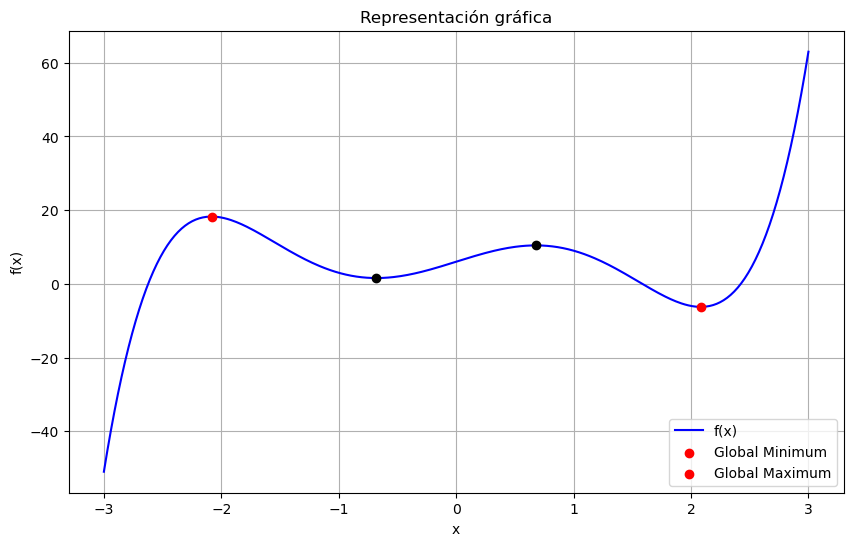

In [ ]:
x_vals = np.linspace(-3, 3, 400)  
y_vals = eq_nueva(x_vals)  

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue")  

#máximos y mínimos globales
plt.scatter(minimo_global, eq_nueva(minimo_global), color="red", label="Global Minimum", zorder=5)
plt.scatter(max_global, eq_nueva(max_global), color="red", label="Global Maximum", zorder=5)

tolerance = 1e-6

# Otros minimos y maximos locales
for minimo in minimos:
    if abs(minimo - minimo_global) > tolerance: 
        plt.scatter(minimo, eq_nueva(minimo), color="black", zorder=5)

for maximo in maximos:
    if abs(maximo - max_global) > tolerance:  
        plt.scatter(maximo, eq_nueva(maximo), color="black", zorder=5)

plt.title("Representación gráfica")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="lower right")  
plt.grid()
plt.show()